<a href="https://colab.research.google.com/github/FerCipriani/Primeros/blob/main/LeeDataSetdesdeDriveyagrupapor_fecha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Rutina para levantar los datos del Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [4]:
%cd /content/drive/My Drive/Colab Notebooks/DataSets/ # Cambio al directorio donde tengo el dataset

/content/drive/My Drive/Colab Notebooks/DataSets


In [30]:
Data = pd.read_csv("HRDataset_v14.csv") # Levanto el dataset

In [31]:
Data.head

<bound method NDFrame.head of                 Employee_Name  EmpID  ...  DaysLateLast30  Absences
0         Adinolfi, Wilson  K  10026  ...               0         1
1    Ait Sidi, Karthikeyan     10084  ...               0        17
2           Akinkuolie, Sarah  10196  ...               0         3
3                Alagbe,Trina  10088  ...               0        15
4            Anderson, Carol   10069  ...               0         2
..                        ...    ...  ...             ...       ...
306            Woodson, Jason  10135  ...               0        13
307        Ybarra, Catherine   10301  ...               5         4
308          Zamora, Jennifer  10010  ...               0        16
309               Zhou, Julia  10043  ...               0        11
310             Zima, Colleen  10271  ...               0         2

[311 rows x 36 columns]>

In [32]:
Data.columns.values

array(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID',
       'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID',
       'FromDiversityJobFairID', 'Salary', 'Termd', 'PositionID',
       'Position', 'State', 'Zip', 'DOB', 'Sex', 'MaritalDesc',
       'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire',
       'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date',
       'DaysLateLast30', 'Absences'], dtype=object)

In [33]:
Data1 = Data[['EmpID','DateofHire']] # Me quedo con las columnas que necesito
Data1

,EmpID,DateofHire
0,10026,7/5/2011
1,10084,3/30/2015
2,10196,7/5/2011
3,10088,1/7/2008
4,10069,7/11/2011
...,...,...
306,10135,7/7/2014
307,10301,9/2/2008
308,10010,4/10/2010
309,10043,3/30/2015


In [35]:
Data1['DateofHire']= pd.to_datetime(Data1['DateofHire']) # Tengo que transformar DateofHire en una columna "datetime"
Data1.info

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<bound method DataFrame.info of      EmpID DateofHire
0    10026 2011-07-05
1    10084 2015-03-30
2    10196 2011-07-05
3    10088 2008-01-07
4    10069 2011-07-11
..     ...        ...
306  10135 2014-07-07
307  10301 2008-09-02
308  10010 2010-04-10
309  10043 2015-03-30
310  10271 2014-09-29

[311 rows x 2 columns]>

In [60]:
Data3 = Data1.groupby(pd.Grouper(key='DateofHire', freq='2y')).count() # Agrupo por la columna datetime (puedo poner Y, 2Y, M, 3M, etc)
Data3.head(23)

,EmpID
DateofHire,
2006-12-31,1
2008-12-31,5
2010-12-31,16
2012-12-31,128
2014-12-31,104
2016-12-31,50
2018-12-31,7


In [61]:
Data3['indice'] = Data3.index #transformo el indice en una columna que llamo indice
Data3['year'] = Data3['indice'].dt.year # transformo ese datetime en año
Data3.head(10)

,EmpID,indice,year
DateofHire,,,
2006-12-31,1,2006-12-31,2006
2008-12-31,5,2008-12-31,2008
2010-12-31,16,2010-12-31,2010
2012-12-31,128,2012-12-31,2012
2014-12-31,104,2014-12-31,2014
2016-12-31,50,2016-12-31,2016
2018-12-31,7,2018-12-31,2018


In [62]:
Data4 = Data3[['EmpID','year']] #elimino las que no quiero
Data4.head()

,EmpID,year
DateofHire,,
2006-12-31,1,2006
2008-12-31,5,2008
2010-12-31,16,2010
2012-12-31,128,2012
2014-12-31,104,2014


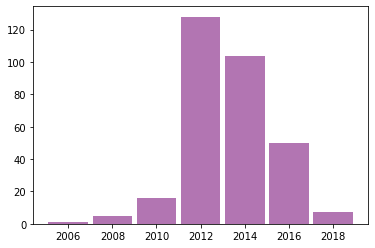

In [63]:
import matplotlib.pyplot as plt #grafico!
data_1 = Data4['EmpID'].tolist()
data_2 = Data4['year'].tolist()

height = Data4['EmpID'].tolist()
bars = Data4['year'].tolist()

x_pos = np.arange(len(bars))
 
# Create bars and choose color
plt.bar(x_pos, height, color = (0.5,0.1,0.5,0.6), width=.9)
 
# Create names on the x axis
plt.xticks(x_pos, bars)
 
# Show graph
plt.show()
